<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/Math345_LAB_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Mean, Standard Deviation, and Finding Outliers

## Learning Objectives
By the end of this tutorial, you will be able to:
- Calculate mean and standard deviation of datasets
- Identify outliers using the Empirical Rule (3-sigma rule)
- Identify outliers using the Interquartile Range (IQR) method
- Compare the effectiveness of different outlier detection methods
- Visualize data distributions and outliers effectively
- Understand when to use each outlier detection method

**Math 345M LAB - Week 1**

## Introduction

In this tutorial, we will perform a comprehensive analysis of a dataset to understand fundamental statistical concepts. We will:

1. **Calculate basic statistical quantities** like mean and standard deviation
2. **Identify outliers** using two different methods:
   - The Empirical Rule (3-sigma rule)
   - The Interquartile Range (IQR) method
3. **Compare the effectiveness** of these different outlier detection approaches
4. **Visualize our findings** to better understand data distributions

## Why Outlier Detection Matters

Outliers are data points that significantly differ from other observations in a dataset. They can:
- **Skew statistical measures** (mean, standard deviation)
- **Indicate data quality issues** (measurement errors, data entry mistakes)
- **Represent genuine anomalies** (rare but important events)
- **Affect machine learning models** and statistical analyses

Understanding how to detect and handle outliers is crucial for accurate data analysis and modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Load and explore the dataset
print("Loading beer dataset...")
df = pd.read_csv('./Datasets/beers.csv') 

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
display(df.head())

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
display(df.describe())


Loading beer dataset...
Dataset shape: (2410, 8)
Columns: ['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces']

First few rows:


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB
None

Basic statistics:


,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


In [3]:
# Data preprocessing and selection
print("Preprocessing data...")

# Drop rows with missing ABV (Alcohol by Volume) values
print(f"Original dataset size: {len(df)}")
mydf = df.dropna(subset=['abv'])
print(f"After removing missing ABV values: {len(mydf)}")
print(f"Removed {len(df) - len(mydf)} rows with missing ABV data")

# Select the data of interest
alcohol = mydf['abv'] * 100  # Convert to percentage
volume = df['ounces']
name = df['name']

print(f"\nAlcohol content statistics:")
print(f"Mean: {alcohol.mean():.2f}%")
print(f"Standard deviation: {alcohol.std():.2f}%")
print(f"Min: {alcohol.min():.2f}%")
print(f"Max: {alcohol.max():.2f}%")

Preprocessing data...
Original dataset size: 2410
After removing missing ABV values: 2348
Removed 62 rows with missing ABV data

Alcohol content statistics:
Mean: 5.98%
Standard deviation: 1.35%
Min: 0.10%
Max: 12.80%


## Data Visualization: Histograms

A **histogram** is a fundamental tool for understanding data distributions. It provides crucial insights about:

### What Histograms Tell Us:
- **Center (location)**: Where most of the data is concentrated
- **Spread (scale)**: How much the data varies from the center
- **Shape**: Whether the distribution is symmetric, skewed, or has multiple peaks
- **Outliers**: Data points that fall far from the main distribution
- **Modality**: Whether there's one peak (unimodal) or multiple peaks (bimodal/multimodal)

### Interpreting Histogram Features:
- **Bell-shaped**: Normal distribution (symmetric)
- **Skewed right**: Long tail on the right (mean > median)
- **Skewed left**: Long tail on the left (mean < median)
- **Multiple peaks**: May indicate different subgroups in the data


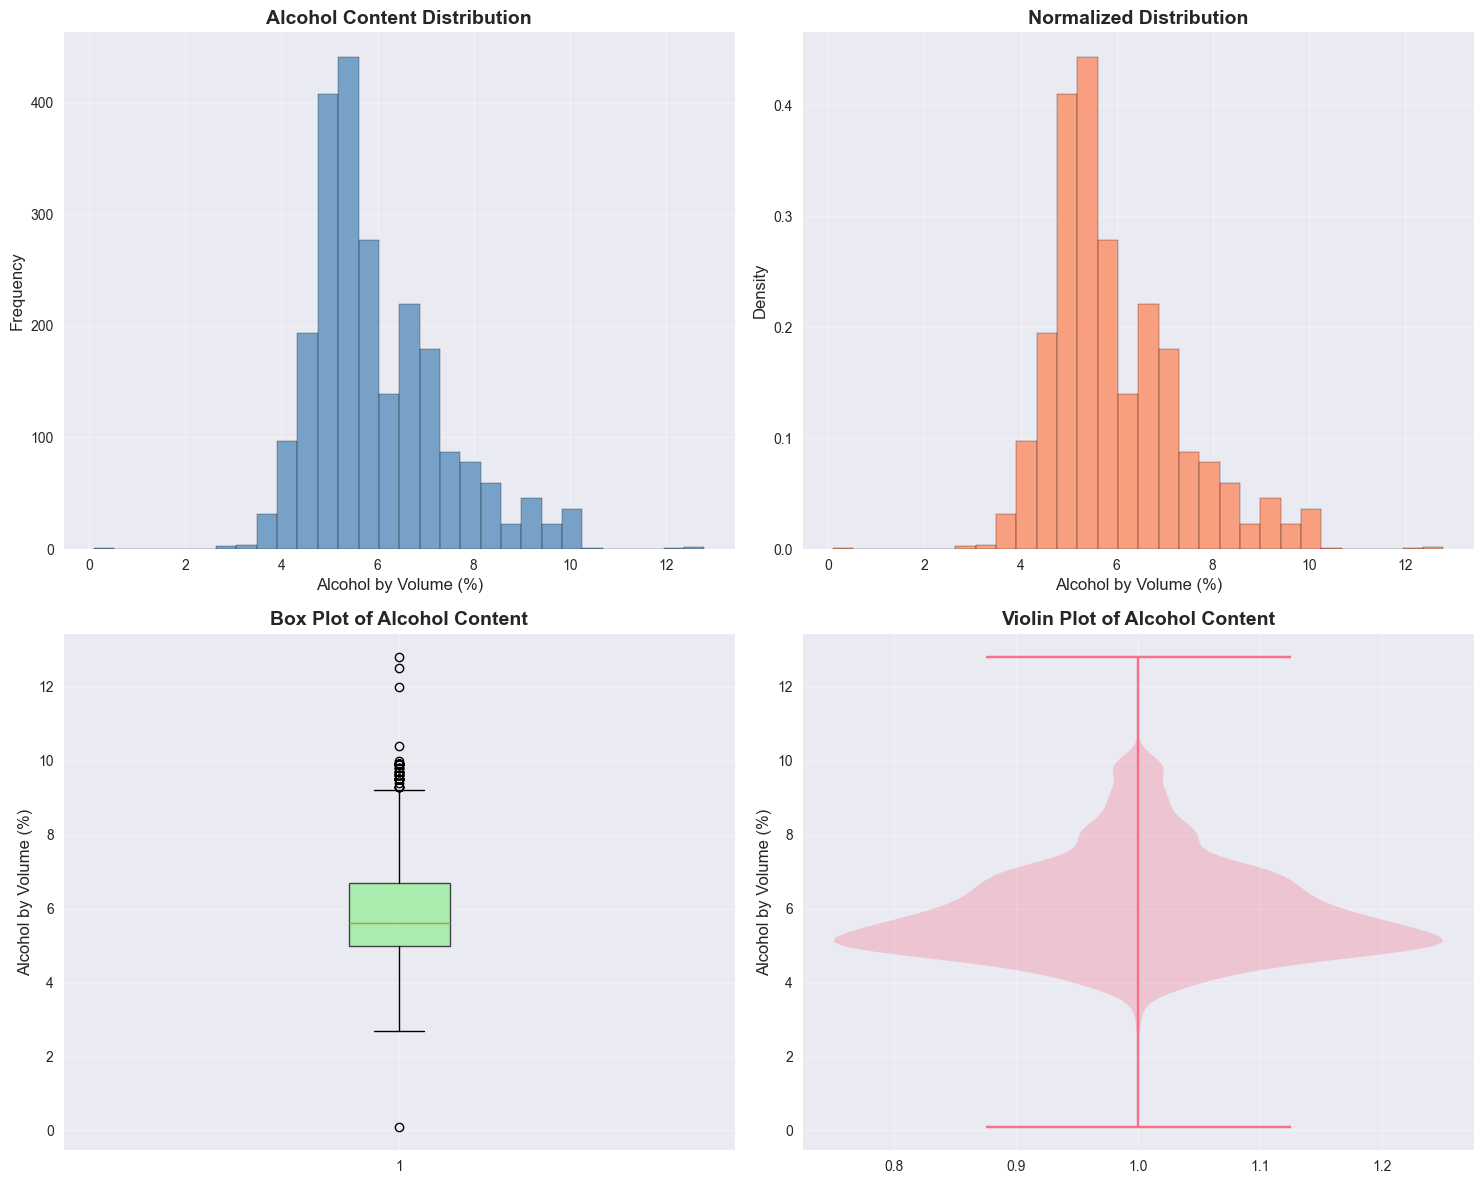

Distribution Statistics:
Mean: 5.98%
Median: 5.60%
Standard Deviation: 1.35%
Skewness: 0.958
Kurtosis: 1.140


In [4]:
# Create a comprehensive histogram with multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Basic histogram
axes[0, 0].hist(alcohol, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Alcohol Content Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Alcohol by Volume (%)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Histogram with density
axes[0, 1].hist(alcohol, bins=30, density=True, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Normalized Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Alcohol by Volume (%)', fontsize=12)
axes[0, 1].set_ylabel('Density', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Box plot
axes[1, 0].boxplot(alcohol, vert=True, patch_artist=True, 
                   boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[1, 0].set_title('Box Plot of Alcohol Content', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Alcohol by Volume (%)', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# Violin plot
axes[1, 1].violinplot(alcohol, vert=True)
axes[1, 1].set_title('Violin Plot of Alcohol Content', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Alcohol by Volume (%)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print distribution statistics
print("Distribution Statistics:")
print(f"Mean: {alcohol.mean():.2f}%")
print(f"Median: {alcohol.median():.2f}%")
print(f"Standard Deviation: {alcohol.std():.2f}%")
print(f"Skewness: {stats.skew(alcohol):.3f}")
print(f"Kurtosis: {stats.kurtosis(alcohol):.3f}")


## Statistical Measures: Mean and Standard Deviation

### Mean (Average)
The **mean** is the arithmetic average of all values in a dataset. For a dataset $X = \{x_1, x_2, ..., x_N\}$:

$$\bar{x} = \frac{1}{N}\sum_{i=1}^{N}x_{i}$$

### Standard Deviation
The **standard deviation** measures how spread out the data is from the mean. It's calculated as:

$$s = \sqrt{\frac{\sum_{i=1}^{N}(x_i - \bar{x})^2}{N-1}}$$

**Note**: We use $N-1$ in the denominator (Bessel's correction) for sample standard deviation to get an unbiased estimate.

## Understanding Outliers

**Outliers** are data points that significantly deviate from the overall pattern of a dataset. They can be caused by:
- **Measurement errors** (instrument malfunction, human error)
- **Data entry mistakes** (typos, wrong units)
- **Genuine anomalies** (rare but real events)
- **Different populations** (data from different sources mixed together)

### Why Detect Outliers?
- **Statistical measures** (mean, standard deviation) can be heavily influenced by outliers
- **Machine learning models** may perform poorly with outliers
- **Data quality** assessment and cleaning
- **Anomaly detection** in real-world applications

## Method 1: The Empirical Rule (3-Sigma Rule)

The **Empirical Rule** applies to **normal (Gaussian) distributions**:

$$P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

### The Rule States:
- **68%** of values fall within **1 standard deviation** of the mean: $[\mu - \sigma, \mu + \sigma]$
- **95%** of values fall within **2 standard deviations** of the mean: $[\mu - 2\sigma, \mu + 2\sigma]$
- **99.7%** of values fall within **3 standard deviations** of the mean: $[\mu - 3\sigma, \mu + 3\sigma]$

### When to Use:
- Data is **normally distributed** or **approximately normal**
- **Unimodal** distribution (single peak)
- **Symmetric** distribution
- Large sample size

### Outlier Detection:
Data points beyond **3 standard deviations** from the mean are considered outliers. 


In [5]:
# Calculate mean and standard deviation
mean = mydf['abv'].mean()  # mean of the alcohol percentage data
std = mydf['abv'].std()    # standard deviation of the alcohol percentage data

print(f"Mean alcohol content: {mean:.4f} ({mean*100:.2f}%)")
print(f"Standard deviation: {std:.4f} ({std*100:.2f}%)")
print(f"Mean ± 1σ: [{mean-std:.4f}, {mean+std:.4f}]")
print(f"Mean ± 2σ: [{mean-2*std:.4f}, {mean+2*std:.4f}]")
print(f"Mean ± 3σ: [{mean-3*std:.4f}, {mean+3*std:.4f}]")


Mean alcohol content: 0.0598 (5.98%)
Standard deviation: 0.0135 (1.35%)
Mean ± 1σ: [0.0462, 0.0733]
Mean ± 2σ: [0.0327, 0.0869]
Mean ± 3σ: [0.0191, 0.1004]


In [6]:
# Apply the Empirical Rule to find outliers
print("Applying Empirical Rule (3-sigma rule) to detect outliers...")

# Find outliers using 3-sigma rule
left_outliers = mydf.loc[mydf['abv'] < mean - 3 * std]
right_outliers = mydf.loc[mydf['abv'] > mean + 3 * std]

# Combine outliers
outliers_empirical = pd.concat([left_outliers, right_outliers])

# Get clean data (without outliers)
clean_data_empirical = mydf.drop(outliers_empirical.index)

print(f"Number of outliers found: {len(outliers_empirical)}")
print(f"Percentage of outliers: {len(outliers_empirical)/len(mydf)*100:.2f}%")
print(f"Clean data points: {len(clean_data_empirical)}")

if len(outliers_empirical) > 0:
    print(f"\nOutlier details:")
    print(f"Left outliers (< mean - 3σ): {len(left_outliers)}")
    print(f"Right outliers (> mean + 3σ): {len(right_outliers)}")
    print(f"Outlier ABV range: {outliers_empirical['abv'].min():.4f} to {outliers_empirical['abv'].max():.4f}")
else:
    print("No outliers detected using the Empirical Rule.")

Applying Empirical Rule (3-sigma rule) to detect outliers...
Number of outliers found: 5
Percentage of outliers: 0.21%
Clean data points: 2343

Outlier details:
Left outliers (< mean - 3σ): 1
Right outliers (> mean + 3σ): 4
Outlier ABV range: 0.0010 to 0.1280


/var/folders/wm/53_4x4rd1tj7bzbgcj4x9y0m0000gn/T/ipykernel_37880/4143023960.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(box_data, labels=labels, patch_artist=True)


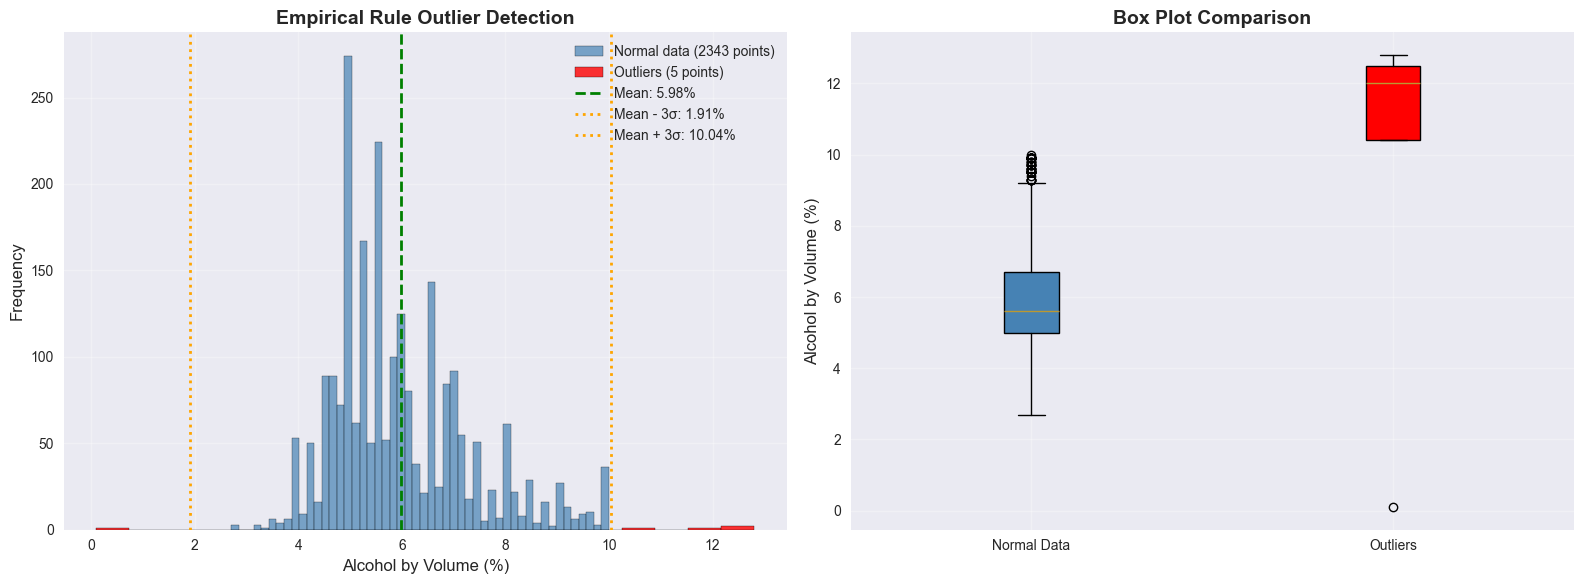


OUTLIERS DETECTED USING EMPIRICAL RULE
Total outliers: 5
Percentage of dataset: 0.21%

Outlier details:


,name,abv
2266,Scotty K NA,0.001
70,London Balling,0.125
2189,Csar,0.120
2278,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,0.128
2279,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,0.104


In [7]:
# Visualize the results of Empirical Rule outlier detection
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Histogram with outliers highlighted
axes[0].hist(clean_data_empirical['abv']*100, bins=50, color='steelblue', alpha=0.7, 
             label=f'Normal data ({len(clean_data_empirical)} points)', edgecolor='black')
if len(outliers_empirical) > 0:
    axes[0].hist(outliers_empirical['abv']*100, bins=20, color='red', alpha=0.8, 
                 label=f'Outliers ({len(outliers_empirical)} points)', edgecolor='black')

axes[0].axvline(mean*100, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean*100:.2f}%')
axes[0].axvline((mean-3*std)*100, color='orange', linestyle=':', linewidth=2, label=f'Mean - 3σ: {(mean-3*std)*100:.2f}%')
axes[0].axvline((mean+3*std)*100, color='orange', linestyle=':', linewidth=2, label=f'Mean + 3σ: {(mean+3*std)*100:.2f}%')

axes[0].set_title('Empirical Rule Outlier Detection', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Alcohol by Volume (%)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Box plot comparison
box_data = [clean_data_empirical['abv']*100]
if len(outliers_empirical) > 0:
    box_data.append(outliers_empirical['abv']*100)
    labels = ['Normal Data', 'Outliers']
else:
    labels = ['All Data']

bp = axes[1].boxplot(box_data, labels=labels, patch_artist=True)
if len(outliers_empirical) > 0:
    bp['boxes'][0].set_facecolor('steelblue')
    bp['boxes'][1].set_facecolor('red')
else:
    bp['boxes'][0].set_facecolor('steelblue')

axes[1].set_title('Box Plot Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Alcohol by Volume (%)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display outlier information
if len(outliers_empirical) > 0:
    print("\n" + "="*60)
    print("OUTLIERS DETECTED USING EMPIRICAL RULE")
    print("="*60)
    print(f"Total outliers: {len(outliers_empirical)}")
    print(f"Percentage of dataset: {len(outliers_empirical)/len(mydf)*100:.2f}%")
    print("\nOutlier details:")
    display(outliers_empirical[['name', 'abv']].round(4))
else:
    print("\nNo outliers detected using the Empirical Rule.")
    print("This suggests the data is well-behaved or the distribution is not normal.")

## Method 2: The Interquartile Range (IQR) Rule

The **IQR method** is more robust than the Empirical Rule because it doesn't assume a normal distribution and is less sensitive to extreme values.

### Five-Number Summary

Any dataset can be described by its **five-number summary**:

1. **$Q_0$ (Minimum)**: The smallest value in the dataset
2. **$Q_1$ (First Quartile)**: 25% of data falls below this value
3. **$Q_2$ (Median)**: 50% of data falls below this value (middle point)
4. **$Q_3$ (Third Quartile)**: 75% of data falls below this value
5. **$Q_4$ (Maximum)**: The largest value in the dataset

### Interquartile Range (IQR)

The **IQR** measures the spread of the middle 50% of the data:

$$IQR = Q_3 - Q_1$$

### IQR Outlier Detection Rule

**Step 1**: Calculate the IQR
**Step 2**: Define the outlier boundaries:
- **Lower bound**: $Q_1 - 1.5 \times IQR$
- **Upper bound**: $Q_3 + 1.5 \times IQR$

**Step 3**: Any data point outside these boundaries is considered an outlier.

### When to Use IQR Method:
- **Non-normal distributions** (skewed, multimodal)
- **Small sample sizes**
- **Robust outlier detection** (less sensitive to extreme values)
- **Any distribution shape**

### Advantages of IQR Method:
- **Distribution-free**: Works with any distribution
- **Robust**: Not affected by extreme outliers
- **Intuitive**: Based on quartiles, easy to understand
- **Conservative**: Less likely to flag legitimate data points as outliers









In [8]:
# Apply the IQR Rule to find outliers
print("Applying IQR Rule to detect outliers...")

# Calculate quartiles and IQR
Q1, Q3 = np.percentile(mydf['abv'], [25, 75])
IQR = Q3 - Q1

print(f"Five-number summary:")
print(f"Q1 (25th percentile): {Q1:.4f} ({Q1*100:.2f}%)")
print(f"Q2 (Median): {mydf['abv'].median():.4f} ({mydf['abv'].median()*100:.2f}%)")
print(f"Q3 (75th percentile): {Q3:.4f} ({Q3*100:.2f}%)")
print(f"IQR: {IQR:.4f} ({IQR*100:.2f}%)")

# Calculate outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier boundaries:")
print(f"Lower bound (Q1 - 1.5×IQR): {lower_bound:.4f} ({lower_bound*100:.2f}%)")
print(f"Upper bound (Q3 + 1.5×IQR): {upper_bound:.4f} ({upper_bound*100:.2f}%)")

# Find outliers using IQR rule
left_outliers_iqr = mydf.loc[mydf['abv'] < lower_bound]
right_outliers_iqr = mydf.loc[mydf['abv'] > upper_bound]

# Combine outliers
outliers_iqr = pd.concat([left_outliers_iqr, right_outliers_iqr])

# Get clean data (without outliers)
clean_data_iqr = mydf.drop(outliers_iqr.index)

print(f"\nIQR Outlier Detection Results:")
print(f"Number of outliers found: {len(outliers_iqr)}")
print(f"Percentage of outliers: {len(outliers_iqr)/len(mydf)*100:.2f}%")
print(f"Clean data points: {len(clean_data_iqr)}")

if len(outliers_iqr) > 0:
    print(f"\nOutlier details:")
    print(f"Left outliers (< lower bound): {len(left_outliers_iqr)}")
    print(f"Right outliers (> upper bound): {len(right_outliers_iqr)}")
    print(f"Outlier ABV range: {outliers_iqr['abv'].min():.4f} to {outliers_iqr['abv'].max():.4f}")
else:
    print("No outliers detected using the IQR Rule.")

Applying IQR Rule to detect outliers...
Five-number summary:
Q1 (25th percentile): 0.0500 (5.00%)
Q2 (Median): 0.0560 (5.60%)
Q3 (75th percentile): 0.0670 (6.70%)
IQR: 0.0170 (1.70%)

Outlier boundaries:
Lower bound (Q1 - 1.5×IQR): 0.0245 (2.45%)
Upper bound (Q3 + 1.5×IQR): 0.0925 (9.25%)

IQR Outlier Detection Results:
Number of outliers found: 69
Percentage of outliers: 2.94%
Clean data points: 2279

Outlier details:
Left outliers (< lower bound): 1
Right outliers (> upper bound): 68
Outlier ABV range: 0.0010 to 0.1280


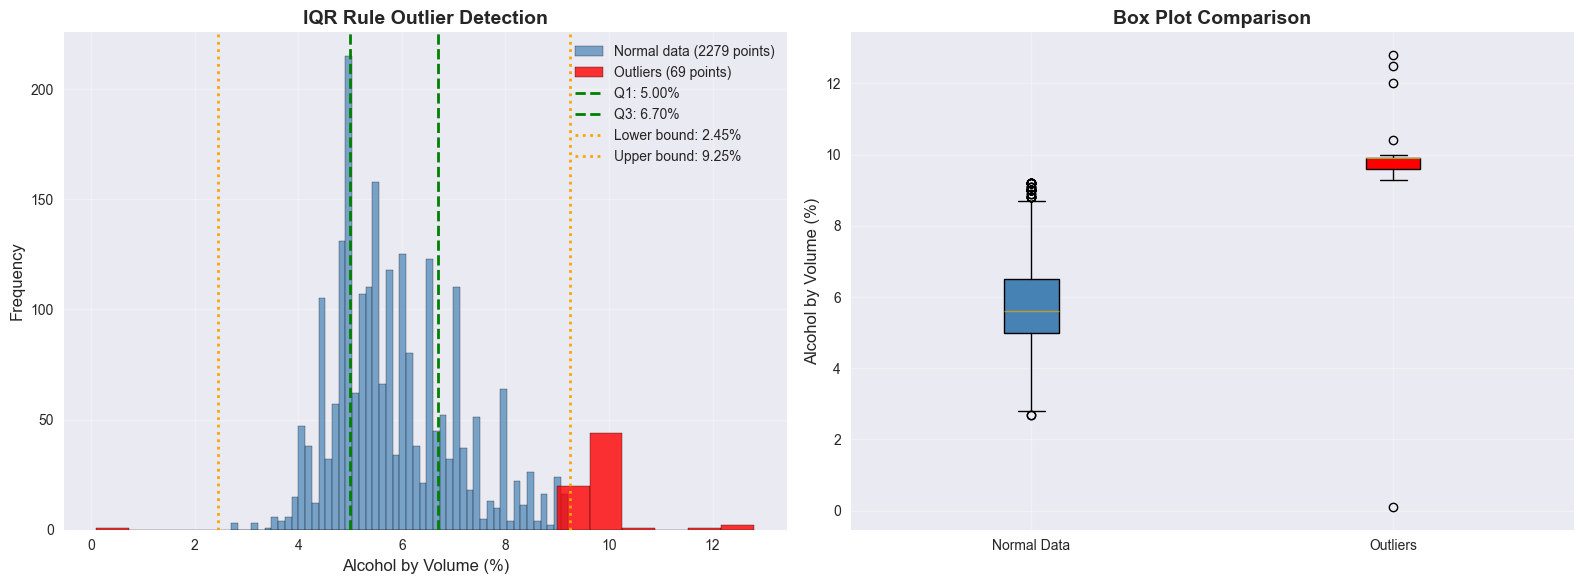


OUTLIERS DETECTED USING IQR RULE
Total outliers: 69
Percentage of dataset: 2.94%

Outlier details:


,name,abv
2266,Scotty K NA,0.001
21,Lower De Boom,0.099
32,Hop Crisis,0.097
70,London Balling,0.125
240,Hemlock Double IPA,0.095
...,...,...
2189,Csar,0.120
2278,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,0.128
2279,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,0.104
2281,Lee Hill Series Vol. 3 - Barrel Aged Imperial ...,0.099


In [12]:

# Visualize the results of IQR outlier detection
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Histogram with outliers highlighted
axes[0].hist(clean_data_iqr['abv']*100, bins=50, color='steelblue', alpha=0.7, 
             label=f'Normal data ({len(clean_data_iqr)} points)', edgecolor='black')
if len(outliers_iqr) > 0:
    axes[0].hist(outliers_iqr['abv']*100, bins=20, color='red', alpha=0.8, 
                 label=f'Outliers ({len(outliers_iqr)} points)', edgecolor='black')

# Add IQR boundaries
axes[0].axvline(Q1*100, color='green', linestyle='--', linewidth=2, label=f'Q1: {Q1*100:.2f}%')
axes[0].axvline(Q3*100, color='green', linestyle='--', linewidth=2, label=f'Q3: {Q3*100:.2f}%')
axes[0].axvline(lower_bound*100, color='orange', linestyle=':', linewidth=2, label=f'Lower bound: {lower_bound*100:.2f}%')
axes[0].axvline(upper_bound*100, color='orange', linestyle=':', linewidth=2, label=f'Upper bound: {upper_bound*100:.2f}%')

axes[0].set_title('IQR Rule Outlier Detection', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Alcohol by Volume (%)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Box plot comparison
box_data = [clean_data_iqr['abv']*100]
if len(outliers_iqr) > 0:
    box_data.append(outliers_iqr['abv']*100)
    labels = ['Normal Data', 'Outliers']
else:
    labels = ['All Data']

bp = axes[1].boxplot(box_data, tick_labels=labels, patch_artist=True)
if len(outliers_iqr) > 0:
    bp['boxes'][0].set_facecolor('steelblue')
    bp['boxes'][1].set_facecolor('red')
else:
    bp['boxes'][0].set_facecolor('steelblue')

axes[1].set_title('Box Plot Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Alcohol by Volume (%)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display outlier information
if len(outliers_iqr) > 0:
    print("\n" + "="*60)
    print("OUTLIERS DETECTED USING IQR RULE")
    print("="*60)
    print(f"Total outliers: {len(outliers_iqr)}")
    print(f"Percentage of dataset: {len(outliers_iqr)/len(mydf)*100:.2f}%")
    print("\nOutlier details:")
    display(outliers_iqr[['name', 'abv']].round(4))
else:
    print("\nNo outliers detected using the IQR Rule.")
    print("This suggests the data is well-behaved or has a tight distribution.")

## Comparison of Methods

Let's compare the results from both outlier detection methods:


COMPARISON OF OUTLIER DETECTION METHODS

Empirical Rule (3-sigma rule):
  - Outliers found: 5
  - Percentage: 0.21%
  - Clean data points: 2343

IQR Rule:
  - Outliers found: 69
  - Percentage: 2.94%
  - Clean data points: 2279


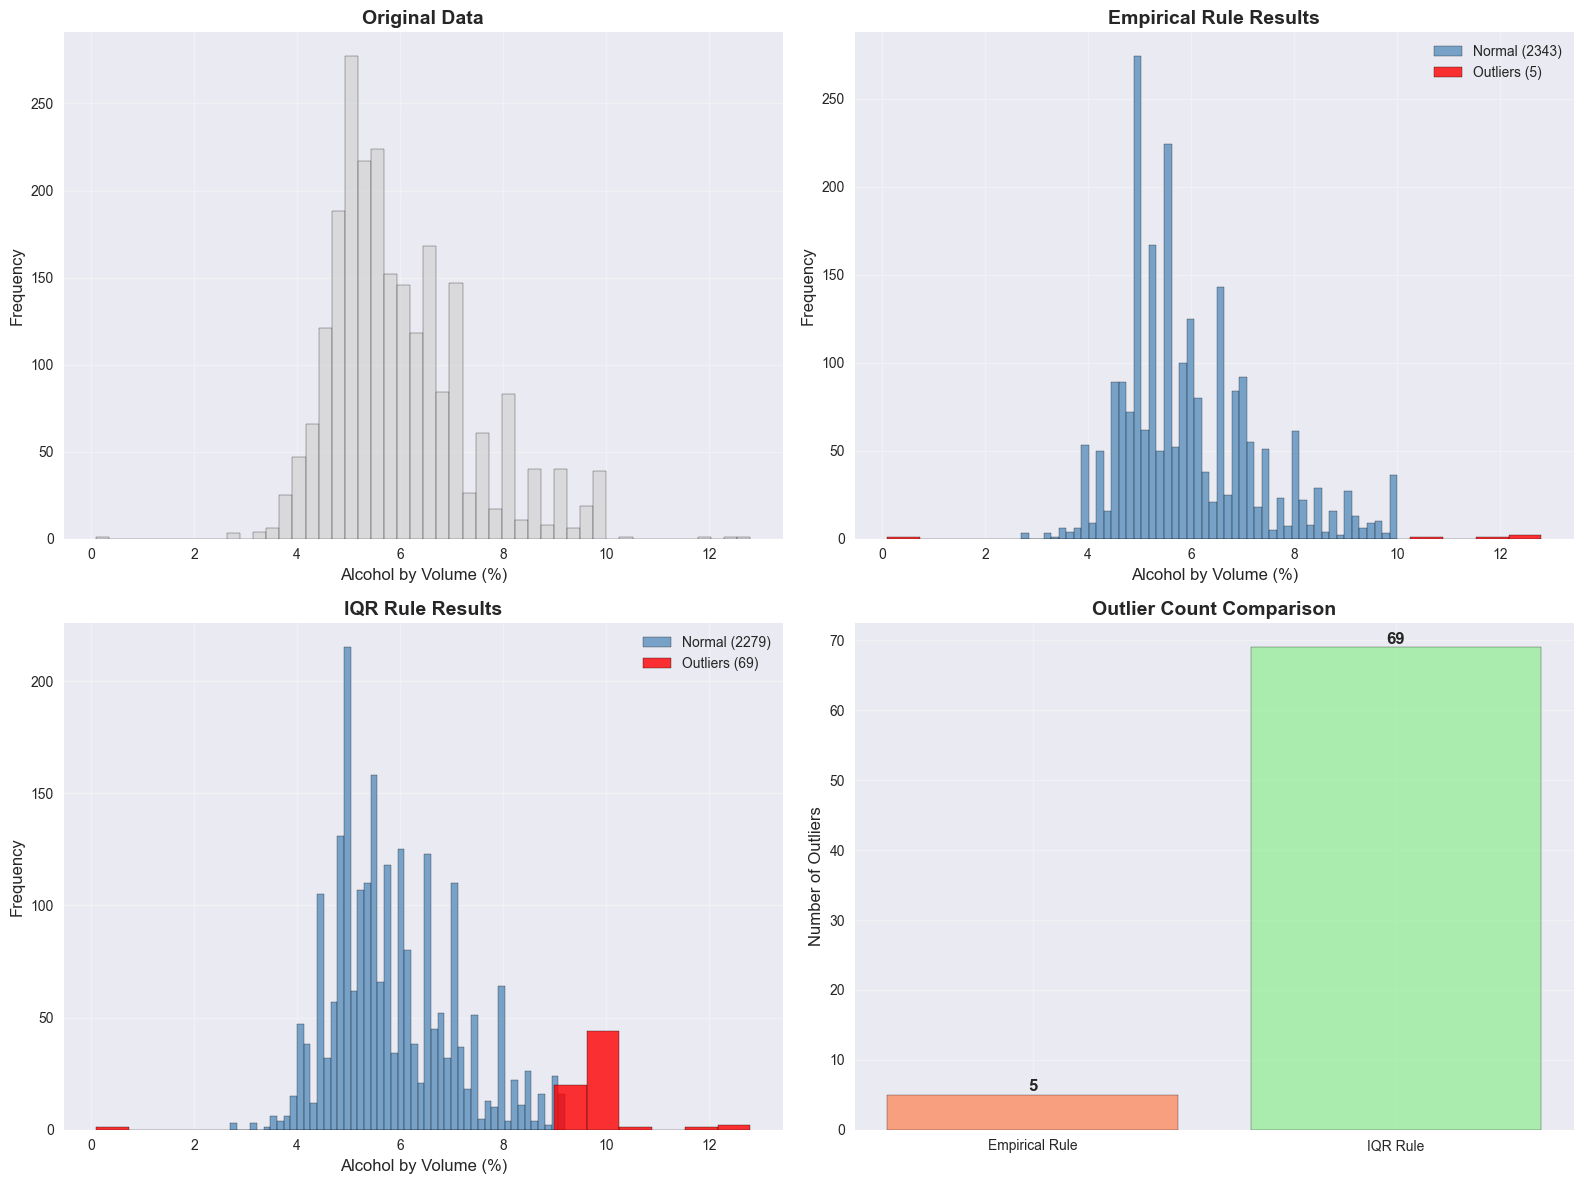


SUMMARY STATISTICS

Original dataset:
  - Total points: 2348
  - Mean: 0.0598 (5.98%)
  - Std Dev: 0.0135 (1.35%)
  - Min: 0.0010 (0.10%)
  - Max: 0.1280 (12.80%)

After Empirical Rule outlier removal:
  - Clean points: 2343
  - Mean: 0.0597 (5.97%)
  - Std Dev: 0.0133 (1.33%)

After IQR Rule outlier removal:
  - Clean points: 2279
  - Mean: 0.0586 (5.86%)
  - Std Dev: 0.0118 (1.18%)


In [10]:
# Compare the two methods
print("="*80)
print("COMPARISON OF OUTLIER DETECTION METHODS")
print("="*80)

print(f"\nEmpirical Rule (3-sigma rule):")
print(f"  - Outliers found: {len(outliers_empirical)}")
print(f"  - Percentage: {len(outliers_empirical)/len(mydf)*100:.2f}%")
print(f"  - Clean data points: {len(clean_data_empirical)}")

print(f"\nIQR Rule:")
print(f"  - Outliers found: {len(outliers_iqr)}")
print(f"  - Percentage: {len(outliers_iqr)/len(mydf)*100:.2f}%")
print(f"  - Clean data points: {len(clean_data_iqr)}")

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original data
axes[0, 0].hist(mydf['abv']*100, bins=50, color='lightgray', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Original Data', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Alcohol by Volume (%)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Empirical Rule results
axes[0, 1].hist(clean_data_empirical['abv']*100, bins=50, color='steelblue', alpha=0.7, 
                label=f'Normal ({len(clean_data_empirical)})', edgecolor='black')
if len(outliers_empirical) > 0:
    axes[0, 1].hist(outliers_empirical['abv']*100, bins=20, color='red', alpha=0.8, 
                    label=f'Outliers ({len(outliers_empirical)})', edgecolor='black')
axes[0, 1].set_title('Empirical Rule Results', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Alcohol by Volume (%)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# IQR Rule results
axes[1, 0].hist(clean_data_iqr['abv']*100, bins=50, color='steelblue', alpha=0.7, 
                label=f'Normal ({len(clean_data_iqr)})', edgecolor='black')
if len(outliers_iqr) > 0:
    axes[1, 0].hist(outliers_iqr['abv']*100, bins=20, color='red', alpha=0.8, 
                    label=f'Outliers ({len(outliers_iqr)})', edgecolor='black')
axes[1, 0].set_title('IQR Rule Results', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Alcohol by Volume (%)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Method comparison
methods = ['Empirical Rule', 'IQR Rule']
outlier_counts = [len(outliers_empirical), len(outliers_iqr)]
colors = ['coral', 'lightgreen']

bars = axes[1, 1].bar(methods, outlier_counts, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Outlier Count Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Outliers', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, outlier_counts):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nOriginal dataset:")
print(f"  - Total points: {len(mydf)}")
print(f"  - Mean: {mydf['abv'].mean():.4f} ({mydf['abv'].mean()*100:.2f}%)")
print(f"  - Std Dev: {mydf['abv'].std():.4f} ({mydf['abv'].std()*100:.2f}%)")
print(f"  - Min: {mydf['abv'].min():.4f} ({mydf['abv'].min()*100:.2f}%)")
print(f"  - Max: {mydf['abv'].max():.4f} ({mydf['abv'].max()*100:.2f}%)")

if len(outliers_empirical) > 0:
    print(f"\nAfter Empirical Rule outlier removal:")
    print(f"  - Clean points: {len(clean_data_empirical)}")
    print(f"  - Mean: {clean_data_empirical['abv'].mean():.4f} ({clean_data_empirical['abv'].mean()*100:.2f}%)")
    print(f"  - Std Dev: {clean_data_empirical['abv'].std():.4f} ({clean_data_empirical['abv'].std()*100:.2f}%)")

if len(outliers_iqr) > 0:
    print(f"\nAfter IQR Rule outlier removal:")
    print(f"  - Clean points: {len(clean_data_iqr)}")
    print(f"  - Mean: {clean_data_iqr['abv'].mean():.4f} ({clean_data_iqr['abv'].mean()*100:.2f}%)")
    print(f"  - Std Dev: {clean_data_iqr['abv'].std():.4f} ({clean_data_iqr['abv'].std()*100:.2f}%)")


## Key Takeaways and Conclusions

### When to Use Each Method:

**Empirical Rule (3-Sigma Rule):**
- ✅ **Best for**: Normal or approximately normal distributions
- ✅ **Advantages**: Simple, widely understood, good for large datasets
- ❌ **Limitations**: Assumes normal distribution, can be too strict or too lenient
- 🎯 **Use when**: Data is normally distributed and you want a standard approach

**IQR Rule:**
- ✅ **Best for**: Any distribution shape, robust to extreme values
- ✅ **Advantages**: Distribution-free, less sensitive to extreme outliers, more conservative
- ❌ **Limitations**: May miss outliers in very skewed distributions
- 🎯 **Use when**: Distribution is unknown, skewed, or you want a robust method

### Practical Recommendations:

1. **Start with IQR** for most real-world datasets (more robust)
2. **Use Empirical Rule** when you know the data is normally distributed
3. **Compare both methods** to understand your data better
4. **Consider the context** - are you looking for data quality issues or genuine anomalies?
5. **Visualize first** - always plot your data before applying outlier detection

### Next Steps:
- Explore more advanced outlier detection methods (Isolation Forest, Local Outlier Factor)
- Learn about outlier treatment strategies (removal, transformation, imputation)
- Practice with different types of datasets (time series, multivariate data)


## References and Further Reading

### Online Resources:
- [Empirical Rule - Statistics How To](https://www.statisticshowto.com/empirical-rule-2/)
- [Five-Number Summary - Statistics How To](https://www.statisticshowto.com/how-to-find-a-five-number-summary-in-statistics/)
- [Histogram Analysis - NIST Handbook](https://www.itl.nist.gov/div898/handbook/eda/section3/histogra.htm)
- [Outlier Detection Methods - Towards Data Science](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)

### Recommended Books:
- **"An Introduction to Statistical Learning"** by James, Witten, Hastie, and Tibshirani
- **"The Elements of Statistical Learning"** by Hastie, Tibshirani, and Friedman
- **"Practical Statistics for Data Scientists"** by Bruce and Bruce

### Python Libraries for Advanced Outlier Detection:
- `scikit-learn`: IsolationForest, LocalOutlierFactor, OneClassSVM
- `pyod`: Comprehensive outlier detection library
- `statsmodels`: Statistical outlier tests